# **ANALYZING WATER QUALITY LEVELS IN NYC BEACHES**

First things first, let's import the libraries.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

Since the dataset is downloaded in my system, I copied the path.

In [8]:
dfb=pd.read_csv("/Beach_Water_Samples_20240714.csv")

Next let's review the dataset.

In [9]:
dfb.head()

,Sample ID,Sample Date,Beach Name,Sample Location,Enterococci Results,Units or Notes
0,050514CP13,05/05/2014,MIDLAND BEACH,Center,20.0,MPN/100 ml
1,062011GR04,06/20/2011,MANHATTAN BEACH,Left,NaN,Result below detection limit
2,072808BH09,07/28/2008,MIDLAND BEACH,Right,28.0,MPN/100 ml
3,051214CP36,05/12/2014,SOUTH BEACH,Right,4.0,MPN/100 ml
4,081511KB07,08/15/2011,CEDAR GROVE,Left,360.0,MPN/100 ml


In [10]:
dfb.shape

(27567, 6)

In [11]:
dfb['Sample Date'].min()

'04/20/2009'

In [12]:
dfb['Sample Date'].max()

'10/01/2007'

Those dates don't seem right. I recall reading the sameple was taken anually since 2005 until the present year, 2024.

Let's look at the data type.

In [13]:
dfb.dtypes

Sample ID               object
Sample Date             object
Beach Name              object
Sample Location         object
Enterococci Results    float64
Units or Notes          object
dtype: object

That makes sense. I should convert the sample date to a date time format.

In [14]:
dfb['Sample Date'] = pd.to_datetime(dfb['Sample Date'], format='%m/%d/%Y')

In [15]:
dfb.dtypes

Sample ID                      object
Sample Date            datetime64[ns]
Beach Name                     object
Sample Location                object
Enterococci Results           float64
Units or Notes                 object
dtype: object

In [16]:
dfb['Sample Date'].min()

Timestamp('2005-05-02 00:00:00')

In [17]:
dfb['Sample Date'].max()

Timestamp('2024-06-18 00:00:00')

Much better! How many beach names does this dataset contain?


In [18]:
dfb['Beach Name'].unique()

array(['MIDLAND BEACH', 'MANHATTAN BEACH', 'SOUTH BEACH', 'CEDAR GROVE',
       'ORCHARD BEACH', 'GERRITSEN/KIDDIE BEACH',
       'SEAGATE BEACH - 38TH STREET', 'DANISH AMERICAN BEACH CLUB',
       'MANHEM BEACH CLUB', 'DOUGLASTON HOMEOWNERS ASSOCIATION',
       'ROCKAWAY BEACH 15TH - 22TH', "WOLFE'S POND PARK",
       'CONEY ISLAND WEST 16TH - WEST 27TH',
       'ROCKAWAY BEACH 116TH - 126TH',
       'WHITESTONE BOOSTER CIVIC  ASSOCIATION',
       'KINGSBOROUGH COMMUNITY COLLEGE', 'SI YMCA OF GREATER NEW YORK',
       'WHITE CROSS FISHING CLUB', 'CONEY ISLAND WEST 8TH - PIER',
       'BREEZY POINT - 219TH STREET', 'BREEZY POINT - REID AVE.',
       'MORRIS YACHT AND BEACH CLUB', 'ROCKAWAY BEACH 59TH - 80TH',
       'SCHUYLER HILL CIVIC ASSOCIATION',
       "TRINITY DANISH YOUNG PEOPLE'S SOCIETY",
       'WEST FORDHAM STREET ASSOCIATION', 'LOCUST POINT YACHT CLUB',
       'SEAGATE BEACH - 42ND STREET', 'ROCKAWAY BEACH 23RD - 59TH',
       'AMERICAN TURNERS', 'ROCKAWAY BEACH 126TH - 149

In [19]:
dfb['Beach Name'].value_counts()

Beach Name
DOUGLASTON HOMEOWNERS ASSOCIATION         1195
ORCHARD BEACH                             1181
SOUTH BEACH                               1174
MORRIS YACHT AND BEACH CLUB               1166
WOLFE'S POND PARK                         1153
MIDLAND BEACH                             1130
DANISH AMERICAN BEACH CLUB                1121
AMERICAN TURNERS                          1107
GERRITSEN/KIDDIE BEACH                    1104
WHITE CROSS FISHING CLUB                  1103
MANHATTAN BEACH                           1101
MANHEM BEACH CLUB                         1100
TRINITY DANISH YOUNG PEOPLE'S SOCIETY     1098
SEAGATE BEACH - 42ND STREET               1089
SCHUYLER HILL CIVIC ASSOCIATION           1087
SEAGATE BEACH - 38TH STREET               1060
KINGSBOROUGH COMMUNITY COLLEGE            1016
WHITESTONE BOOSTER CIVIC  ASSOCIATION      941
SI YMCA OF GREATER NEW YORK                893
WEST FORDHAM STREET ASSOCIATION            824
LOCUST POINT YACHT CLUB                    806
CE

How many beaches?

In [20]:
dfb['Beach Name'].unique().shape[0]

40

In [21]:
dfb['Sample Date'].value_counts()

Sample Date
2011-08-30    86
2012-07-02    72
2007-07-02    61
2011-08-31    57
2007-06-06    55
              ..
2021-05-27     2
2021-09-20     1
2007-06-16     1
2007-07-29     1
2005-05-25     1
Name: count, Length: 1046, dtype: int64

How about sample dates?

In [22]:
dfb['Sample Date'].unique().shape[0]

1046

The Beach Water Data dictionary states the text in "Sample Location" Column is either "left, right, center" I'll trust this is accurate.

How many results are below detection level?

In [23]:
(dfb['Units or Notes'] == 'Result below detection limit').value_counts()

Units or Notes
False    20122
True      7445
Name: count, dtype: int64

In [24]:
(dfb['Units or Notes'] == 'Result').value_counts()

Units or Notes
False    27567
Name: count, dtype: int64

In [25]:
dfb['Units or Notes'].value_counts()

Units or Notes
MPN/100 ml                      20122
Result below detection limit     7445
Name: count, dtype: int64

Is it the same as non numerical values in the Enerococci column?

In [26]:
nan_count = dfb['Enterococci Results'].isna().sum()
print(nan_count)

7445


I recall seeing classmate using "len" in their notebook. I remember the rows in this dataset is 27k but not the exact number. Instead of scrolling up. I'll create a new object

In [27]:
total_rows = len(dfb)
print(total_rows)

27567


🍎 Len: "retrieves the length of an object"

In [28]:
nan_percentage = (nan_count / total_rows) * 100
print(nan_percentage)

27.00692857401966


That's a high percentage. Are there certain beaches that have more nan values than others?

I'm not going to recall the name of the bacteria. Let's rename that column.


In [29]:
dfb.rename(columns={'Enterococci Results': 'E. Results'}, inplace=True)

In [30]:
nan_mask = dfb['E. Results'].isna()
nan_beach_counts = dfb[nan_mask].groupby('Beach Name').size().reset_index(name='NaN_Count')

In [31]:
nan_beach_counts.sort_values(by='NaN_Count', ascending=False)

,Beach Name,NaN_Count
20,ORCHARD BEACH,449
30,SEAGATE BEACH - 38TH STREET,400
18,MIDLAND BEACH,369
31,SEAGATE BEACH - 42ND STREET,348
38,WOLFE'S POND PARK,345
29,SCHUYLER HILL CIVIC ASSOCIATION,321
19,MORRIS YACHT AND BEACH CLUB,313
33,SOUTH BEACH,299
17,MANHEM BEACH CLUB,262
16,MANHATTAN BEACH,260


🍎 Mask: "acts like a selective filter. It allows you to replace values based on certain conditions and helps you edit it conditionally"

I still haven't decided what would I like to do with my NaN values. I should've figured out the percentage of each beach with "Result below detaction level" instead.


In [32]:
nan_percentage2 = dfb.groupby('Beach Name')['E. Results'].apply(lambda x: x.isna().mean() * 100)
nan_percentage2 = nan_percentage2.sort_values(ascending=False)
print(nan_percentage2)

Beach Name
ROCKAWAY BEACH 59TH - 80TH                57.526882
ROCKAWAY BEACH 23RD - 59TH                57.297297
ROCKAWAY BEACH 126TH - 149TH              56.084656
ROCKAWAY BEACH 116TH - 126TH              56.084656
ROCKAWAY BEACH 80TH - 95TH                54.301075
ROCKAWAY BEACH 95TH - 116TH               54.054054
BREEZY POINT - REID AVE.                  47.598253
CONEY ISLAND OCEAN PKWY - WEST 8TH        42.400000
CONEY ISLAND WEST 8TH - PIER              41.032609
ROCKAWAY BEACH 15TH - 22TH                40.425532
CONEY ISLAND BR. 6TH - OCEAN PKWY         40.000000
ROCKAWAY BEACH 9TH - 13TH                 40.000000
ORCHARD BEACH                             38.018628
SEAGATE BEACH - 38TH STREET               37.735849
CONEY ISLAND WEST 28TH - WEST 37TH        35.969388
CONEY ISLAND WEST 16TH - WEST 27TH        35.483871
BREEZY POINT - 219TH STREET               35.338346
MIDLAND BEACH                             32.654867
SEAGATE BEACH - 42ND STREET               31.955923
C

💡Oh! It was giving me the "mean of the boolean mask, which effectively gives the proportion of NaN values"!

Before dropping NaN values, I want to combine beach segments into their respective whole beach names to accommodate more results.


In [33]:
dfb['Beach Name'] = dfb['Beach Name'].apply(lambda x: 'ROCKAWAY BEACH' if x.startswith('ROCKAWAY') else x)

In [34]:
def replace_beach_name(x):
  replacements = {'ROCKAWAY': 'ROCKAWAY BEACH',
                  'CONEY': 'CONEY ISLAND',
                  'SEAGATE': 'SEAGATE',
                  'BREEZY': 'BREEZY POINT'}
  for old_name, new_name in replacements.items():
    if x.startswith(old_name):
      return new_name
  return x

dfb['Beach Name'] = dfb['Beach Name'].apply(replace_beach_name)

In [35]:
dfb['Beach Name'].value_counts()

Beach Name
CONEY ISLAND                              2253
SEAGATE                                   2149
ROCKAWAY BEACH                            1493
DOUGLASTON HOMEOWNERS ASSOCIATION         1195
ORCHARD BEACH                             1181
SOUTH BEACH                               1174
MORRIS YACHT AND BEACH CLUB               1166
WOLFE'S POND PARK                         1153
MIDLAND BEACH                             1130
DANISH AMERICAN BEACH CLUB                1121
AMERICAN TURNERS                          1107
GERRITSEN/KIDDIE BEACH                    1104
WHITE CROSS FISHING CLUB                  1103
MANHATTAN BEACH                           1101
MANHEM BEACH CLUB                         1100
TRINITY DANISH YOUNG PEOPLE'S SOCIETY     1098
SCHUYLER HILL CIVIC ASSOCIATION           1087
KINGSBOROUGH COMMUNITY COLLEGE            1016
WHITESTONE BOOSTER CIVIC  ASSOCIATION      941
SI YMCA OF GREATER NEW YORK                893
WEST FORDHAM STREET ASSOCIATION            824
LO

How many beaches are there now?

In [36]:
dfb['Beach Name'].unique().shape[0]

26

In [37]:
nan_counts = dfb['E. Results'].isna().groupby(dfb['Beach Name']).sum().reset_index(name='NaN_Count')

total_counts=dfb.groupby('Beach Name').size().reset_index(name='Total_Count')
merged_df=nan_counts.merge(total_counts, on='Beach Name')
merged_df['NaN_Percentage']=(merged_df['NaN_Count'])/merged_df['Total_Count']*100

merged_df=merged_df.sort_values(by='NaN_Count', ascending=False)
print(merged_df)

                                Beach Name  NaN_Count  Total_Count  \
4                             CONEY ISLAND        846         2253   
16                          ROCKAWAY BEACH        776         1493   
18                                 SEAGATE        748         2149   
15                           ORCHARD BEACH        449         1181   
13                           MIDLAND BEACH        369         1130   
25                       WOLFE'S POND PARK        345         1153   
17         SCHUYLER HILL CIVIC ASSOCIATION        321         1087   
14             MORRIS YACHT AND BEACH CLUB        313         1166   
20                             SOUTH BEACH        299         1174   
12                       MANHEM BEACH CLUB        262         1100   
11                         MANHATTAN BEACH        260         1101   
5               DANISH AMERICAN BEACH CLUB        246         1121   
3                              CEDAR GROVE        229          805   
8           KINGSBOR

In [38]:
print(merged_df[['Beach Name','NaN_Percentage']].sort_values(by='NaN_Percentage', ascending=False))

                                Beach Name  NaN_Percentage
16                          ROCKAWAY BEACH       51.975887
2                             BREEZY POINT       41.010101
15                           ORCHARD BEACH       38.018628
4                             CONEY ISLAND       37.549933
18                                 SEAGATE       34.806887
13                           MIDLAND BEACH       32.654867
25                       WOLFE'S POND PARK       29.921943
17         SCHUYLER HILL CIVIC ASSOCIATION       29.530819
3                              CEDAR GROVE       28.447205
14             MORRIS YACHT AND BEACH CLUB       26.843911
20                             SOUTH BEACH       25.468484
10                 LOCUST POINT YACHT CLUB       24.441687
12                       MANHEM BEACH CLUB       23.818182
11                         MANHATTAN BEACH       23.614896
22         WEST FORDHAM STREET ASSOCIATION       22.451456
5               DANISH AMERICAN BEACH CLUB       21.9446

Although the overall percentage of missing values is  still high, I've chosen to drop NaN values since the most popular beaches, which are the primary focus of this analysis, have comparable missing data rates

In [39]:
dfb.dropna(subset=['E. Results'], inplace=True)
dfb.shape[0]

20122

In order to leverage Pandas' time series functionalities effectively, it is recomended I set "Sample Date" as the index.

In [40]:
dfb['Sample Date'] = pd.to_datetime(dfb['Sample Date'])

dfb.set_index('Sample Date', inplace=True)

Based on personal experience and general knowledge, I’ve selected Orchard, Rockaway, and Coney Island as the primary focus beaches. Due to similar missing data rates, Seagate and Breezy Point have been included for a more comprehensive analysis.

In [41]:
target_beaches = ['ROCKAWAY BEACH', 'CONEY ISLAND', 'BREEZY POINT', 'ORCHARD BEACH', 'SEAGATE']
dfb_f = dfb[dfb['Beach Name'].isin(target_beaches)]
dfb_f.head(10)

,Sample ID,Beach Name,Sample Location,E. Results,Units or Notes
Sample Date,,,,,
2011-08-29,082911SG01,ORCHARD BEACH,Left,4.0,MPN/100 ml
2009-07-29,072909SG07,ORCHARD BEACH,Left,8.0,MPN/100 ml
2011-04-25,042511GR14,SEAGATE,Left,480.0,MPN/100 ml
2008-07-28,072808GR17,SEAGATE,Left,8.0,MPN/100 ml
2010-08-12,081210KB06,CONEY ISLAND,Right,48.0,MPN/100 ml
2010-08-24,082410IM13,SEAGATE,Right,4.0,MPN/100 ml
2010-08-24,082410IM11,SEAGATE,Left,8.0,MPN/100 ml
2013-05-09,050913GR01,BREEZY POINT,Left,72.0,MPN/100 ml
2009-08-25,082509GR07,ROCKAWAY BEACH,Center,8.0,MPN/100 ml


In [42]:
dfb_f.shape[0]

4549

Research states "Water Quality Standards: 30 day Geomean limit: 35 MPN/100mL, Daily Average limit: 104 MPN/100mL" Let's keep only the days the targeted beaches were open

In [43]:
dfb_f_open = dfb_f[dfb_f['E. Results'] <= 104]

In [44]:
dfb_f_open.shape[0]

4343

In [45]:
dfb_f_open['E. Results'].describe()

count    4343.000000
mean       14.418374
std        16.509927
min         4.000000
25%         4.000000
50%         9.900000
75%        16.000000
max       104.000000
Name: E. Results, dtype: float64

The dataset dictionary states the frequency of samples is "Between May and September of each year". Let's test out our time based indexing

In [46]:
yearly_mean = dfb_f_open.groupby(['Beach Name', dfb_f_open.index.year])['E. Results'].mean().round(2).unstack('Beach Name')

print(yearly_mean)

Beach Name   BREEZY POINT  CONEY ISLAND  ORCHARD BEACH  ROCKAWAY BEACH  \
Sample Date                                                              
2005                 9.39         16.53          13.37           12.52   
2006                13.60         19.76          15.48            9.60   
2007                12.80         14.82          15.22            6.96   
2008                16.60         13.00          10.67            6.48   
2009                10.13         12.48          17.68            8.00   
2010                 9.09         12.37          14.07            8.00   
2011                19.00         12.12          10.57            8.32   
2012                22.17         15.42          11.20            5.70   
2013                12.67         17.07           9.28            9.50   
2014                16.44         18.72          11.83           14.22   
2015                 6.50         12.38           9.33            7.60   
2016                15.11         16.8

🍎Unstack is used to: "to reshape data by moving one level of the hierarchical index to the columns"

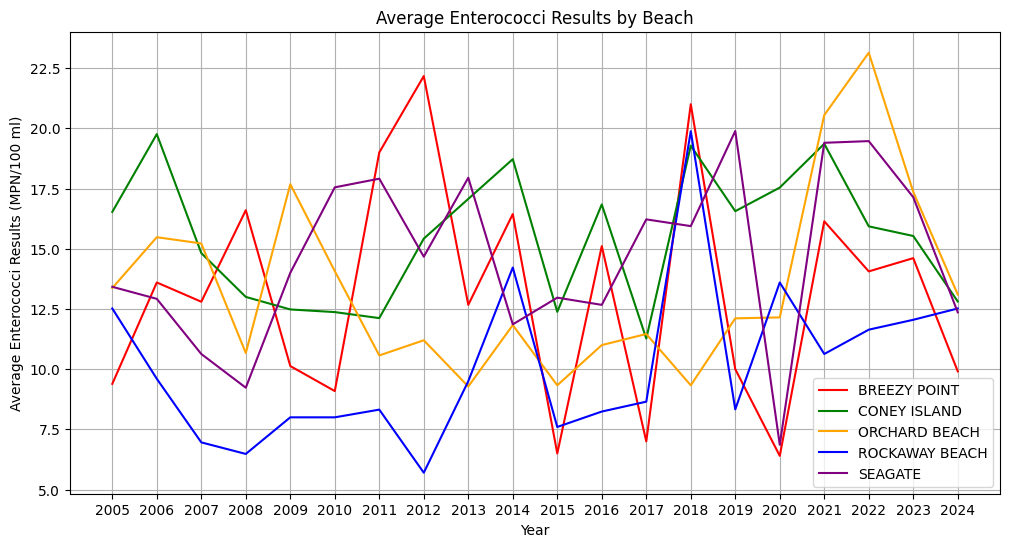

In [47]:
beach_colors = {'ROCKAWAY BEACH': 'blue', 'CONEY ISLAND': 'green',
                'BREEZY POINT': 'red', 'ORCHARD BEACH': 'orange',
                'SEAGATE': 'purple'}

plt.figure(figsize=(12, 6))

for beach, data in yearly_mean.items():
    color = beach_colors.get(beach, 'black')
    plt.plot(data.index.astype(int), data.values, label=beach, color=color)

plt.xlabel('Year')
plt.ylabel('Average Enterococci Results (MPN/100 ml)')
plt.title('Average Enterococci Results by Beach')
plt.legend()
plt.grid(True)

plt.xticks(ticks=data.index.astype(int))

plt.show()

This plot seems overcrowded, let's try another visualization.

In [48]:
import seaborn as sns


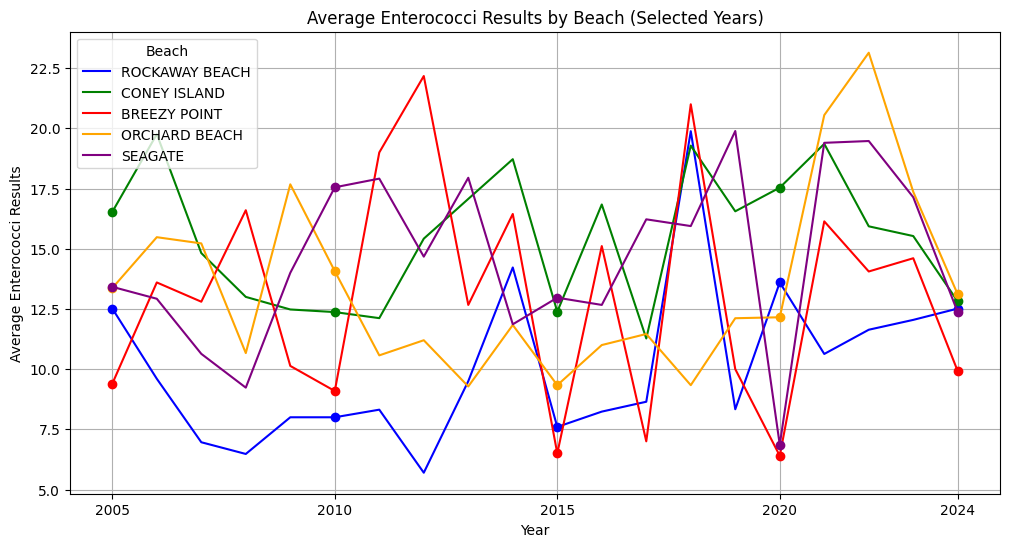

In [49]:
beach_colors = {'ROCKAWAY BEACH': 'blue', 'CONEY ISLAND': 'green',
                'BREEZY POINT': 'red', 'ORCHARD BEACH': 'orange',
                'SEAGATE': 'purple'}

selected_years = [2005, 2010, 2015, 2020, 2024]

dfb_grouped = dfb_f_open.groupby([dfb_f_open.index.year, 'Beach Name'])['E. Results'].mean().reset_index()

dfb_filtered = dfb_grouped[dfb_grouped['Sample Date'].isin(selected_years)]

fig, ax = plt.subplots(figsize=(12, 6))

for beach, color in beach_colors.items():
    beach_data = dfb_grouped[dfb_grouped['Beach Name'] == beach]
    ax.plot(beach_data['Sample Date'], beach_data['E. Results'], linestyle='-', label=beach, color=color)

    selected_beach_data = beach_data[beach_data['Sample Date'].isin(selected_years)]
    ax.plot(selected_beach_data['Sample Date'], selected_beach_data['E. Results'], marker='o', linestyle='', color=color)

plt.title('Average Enterococci Results by Beach (Selected Years)')
plt.ylabel('Average Enterococci Results')
plt.xlabel('Year')
plt.legend(title='Beach')
plt.grid(True)

plt.xticks(ticks=selected_years, labels=selected_years)

plt.show()

What are the trends in the last 5 years?

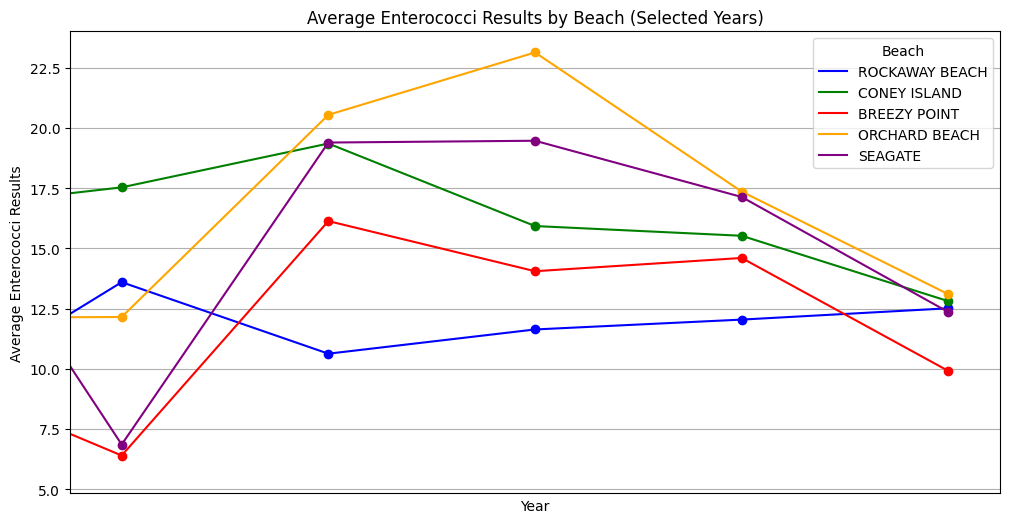

In [50]:
import matplotlib.dates as mdates
beach_colors = {'ROCKAWAY BEACH': 'blue', 'CONEY ISLAND': 'green',
                 'BREEZY POINT': 'red', 'ORCHARD BEACH': 'orange',
                 'SEAGATE': 'purple'}

selected_years = [2020, 2021, 2022, 2023, 2024]

dfb_grouped = dfb_f_open.groupby([dfb_f_open.index.year, 'Beach Name'])['E. Results'].mean().reset_index()

dfb_filtered = dfb_grouped[dfb_grouped['Sample Date'].isin(selected_years)]

fig, ax = plt.subplots(figsize=(12, 6))

for beach, color in beach_colors.items():
    beach_data = dfb_grouped[dfb_grouped['Beach Name'] == beach]
    ax.plot(beach_data['Sample Date'], beach_data['E. Results'], linestyle='-', label=beach, color=color)

    selected_beach_data = beach_data[beach_data['Sample Date'].isin(selected_years)]
    ax.plot(selected_beach_data['Sample Date'], selected_beach_data['E. Results'], marker='o', linestyle='', color=color)

plt.title('Average Enterococci Results by Beach (Selected Years)')
plt.ylabel('Average Enterococci Results')
plt.xlabel('Year')
plt.legend(title='Beach')
plt.grid(True)
plt.margins(x=0.1)

# Set x-axis tick positions and labels with adjustments
plt.xticks(ticks=range(len(selected_years)), labels=selected_years, ha='center')  # Center labels

plt.xlim(min(selected_years) - 0.25, max(selected_years) + 0.25)

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.show()


In [51]:
beach_colors = {'ROCKAWAY BEACH': 'blue', 'CONEY ISLAND': 'green',
                'BREEZY POINT': 'red', 'ORCHARD BEACH': 'orange',
                'SEAGATE': 'purple'}

I'm curious to see a different type of plot.

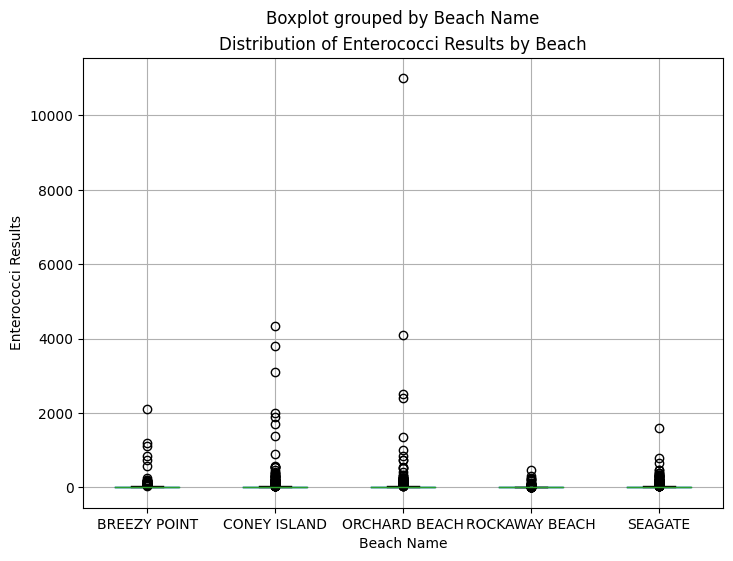

In [52]:
fig, ax = plt.subplots(figsize=(8, 6))
dfb_f.boxplot(by='Beach Name', column='E. Results', ax=ax)
plt.title('Distribution of Enterococci Results by Beach')
plt.ylabel('Enterococci Results')
plt.xlabel('Beach Name')
plt.show()

How does it compare if I only take into conisideration when the values are below 104 MPN/100mL?

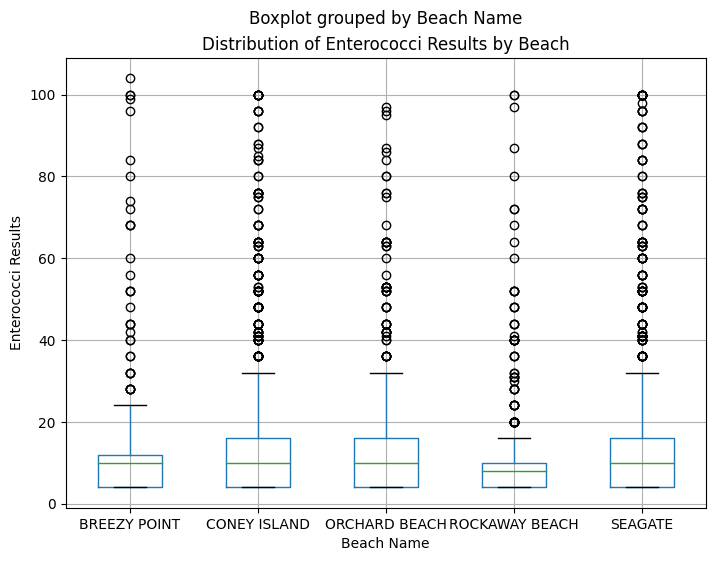

In [53]:
fig, ax = plt.subplots(figsize=(8, 6))
dfb_f_open.boxplot(by='Beach Name', column='E. Results', ax=ax)
plt.title('Distribution of Enterococci Results by Beach')
plt.ylabel('Enterococci Results')
plt.xlabel('Beach Name')
plt.show()

What if I take into conisideration only this year?

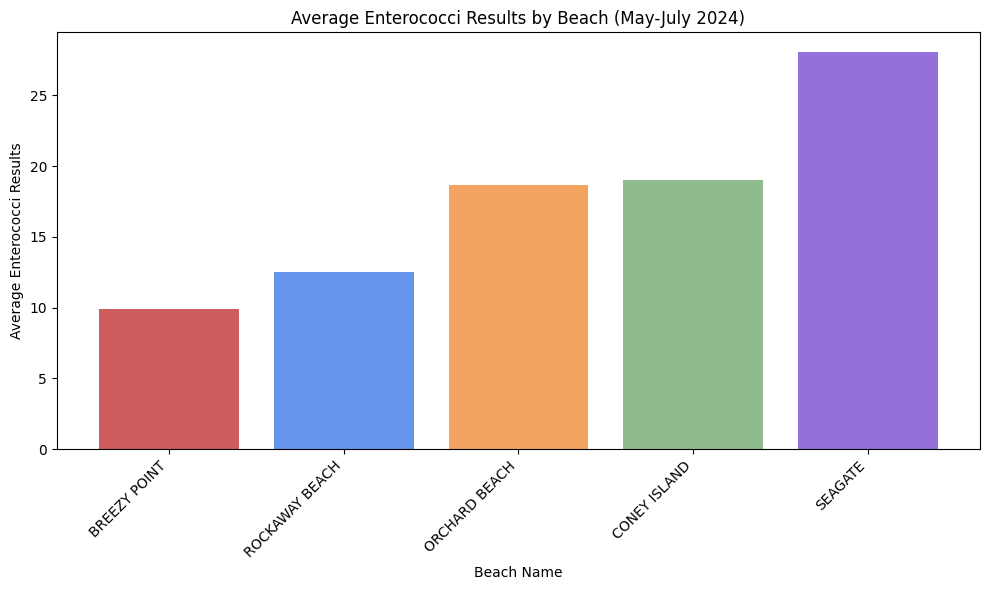

The beach with the lowest average Enterocucci Results this year (May-July) is: BREEZY POINT


In [55]:
current_year = 2024
dfb_current_year = dfb_f[dfb_f.index.year == current_year]
dfb_filtered = dfb_current_year[(dfb_current_year.index.month >= 5) & (dfb_current_year.index.month <= 9)]

dfb_grouped = dfb_filtered.groupby('Beach Name')['E. Results'].mean().reset_index()

dfb_grouped_sorted = dfb_grouped.sort_values('E. Results')

beach_colors = {'ROCKAWAY BEACH': 'cornflowerblue', 'CONEY ISLAND': 'darkseagreen',
                'BREEZY POINT': 'indianred', 'ORCHARD BEACH': 'sandybrown',
                'SEAGATE': 'mediumpurple'}

plt.figure(figsize=(10, 6))

colors = [beach_colors[beach] for beach in dfb_grouped_sorted['Beach Name']]
plt.bar(dfb_grouped_sorted['Beach Name'], dfb_grouped_sorted['E. Results'], color=colors)

plt.title(f'Average Enterococci Results by Beach (May-July {current_year})')
plt.ylabel('Average Enterococci Results')
plt.xlabel('Beach Name')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

lowest_beach = dfb_grouped_sorted.iloc[0]['Beach Name']
print(f"The beach with the lowest average Enterocucci Results this year (May-July) is: {lowest_beach}")

# **Conclusion**:
Based on the analysis of the Beach Water Samples dataset:

-Rockaway Beach has conistently maintained low Enterocucci levels, indicating good water quality.

-Breezy Point has steadily shown decreasing Enterococci levels, reaching it's lowest point in this year and currently boasting the best results among the beaches analyzed.